# Virginia COVID-19 Cases

In [5]:
!git clone https://github.com/jammy-bot/va-covid-plotly.git

fatal: destination path 'va-covid-plotly' already exists and is not an empty directory.


__Import Required Libraries__

In [6]:
# importing os for directory / path operations
import os
os.getcwd()

'/home/jovyan/work/va-covid-eda'

In [7]:
# importing for dataframe
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd


In [8]:
# importing for plotting
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style="white", color_codes=True)

In [9]:
# importing plotly express for plot animation
try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px

     |████████████████████████████████| 12.9 MB 3.6 MB/s eta 0:00:01    |██▊                             | 1.1 MB 3.6 MB/s eta 0:00:04
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=cd829275cfcbde389c9150e9341d2589ac5a4e131dcd031d8affb70d631edf08
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [66]:
# move to the repo path
# os.chdir('/content/va-covid-plotly/')
# os.getcwd()

## Obtain Data

Data sourced from [Virginia Department of Health](https://www.vdh.virginia.gov/coronavirus/) (VDH)--last updated July 30, 2020.

Each row represents the overall count of COVID-19 cases, hospitalizations, deaths for each locality in Virginia by report date since reporting began for this dataset.

Column Name |	Description	| Type
--- | --- | ---
Report Date |	Date when the case, hospitalization, or death is published |	Date & Tim
FIPS |	5-digit code (51XXX) for the locality |	Plain Text
Locality |	Independent city or county in Virginia |	Plain Text
VDH Health District |	Health district name assigned by the Virginia Department of Health. There are 35 health districts in Virginia. |	Plain Text
Total Cases |	Total number of COVID-19 cases |	Number
Hospitalizations |	Total number of COVID-19 hospitalizations |	Number
Deaths |	Total number of COVID-19 deaths |	Number


In [12]:
# reading VDH data from csv file
data_df = pd.read_csv("data/VDH-COVID-19-PublicUseDataset-Cases.csv", 
                      dtype={"fips": str})

# viewing dataframe shape and first / last rows
print(data_df.shape, "\n")
display(data_df.head())

(18088, 7) 



Report Date   FIPS   Locality VDH Health District  Total Cases  \
0  03/17/2020  51001   Accomack       Eastern Shore            0   
1  03/17/2020  51003  Albemarle    Thomas Jefferson            0   
2  03/17/2020  51005  Alleghany           Alleghany            0   
3  03/17/2020  51007     Amelia            Piedmont            0   
4  03/17/2020  51009    Amherst    Central Virginia            0   

   Hospitalizations  Deaths  
0                 0       0  
1                 0       0  
2                 0       0  
3                 0       0  
4                 0       0

## Scrub Data

__View dataset info__

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Report Date          18088 non-null  object
 1   FIPS                 18088 non-null  int64 
 2   Locality             18088 non-null  object
 3   VDH Health District  18088 non-null  object
 4   Total Cases          18088 non-null  int64 
 5   Hospitalizations     18088 non-null  int64 
 6   Deaths               18088 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 989.3+ KB


There are no rows missing data.

We will make a copy of the dataframe, for data preparation.

In [14]:
# instantiating a copy of the dataframe as cities_df
cities_df = data_df.copy()

# viewing first rows of dataframe
cities_df.head()

Report Date   FIPS   Locality VDH Health District  Total Cases  \
0  03/17/2020  51001   Accomack       Eastern Shore            0   
1  03/17/2020  51003  Albemarle    Thomas Jefferson            0   
2  03/17/2020  51005  Alleghany           Alleghany            0   
3  03/17/2020  51007     Amelia            Piedmont            0   
4  03/17/2020  51009    Amherst    Central Virginia            0   

   Hospitalizations  Deaths  
0                 0       0  
1                 0       0  
2                 0       0  
3                 0       0  
4                 0       0

In [15]:
# converting column name spaces to "_" and converting to lower case
cities_df.columns = [x.lower().replace(" ", "_") for x in cities_df.columns]

# convert the `locality` column to string type
cities_df["locality"] = cities_df["locality"].astype(str)

# dropping the health district column
cities_df.drop(["vdh_health_district"], axis=1, inplace=True)

# viewing info after adjustments
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_date       18088 non-null  object
 1   fips              18088 non-null  int64 
 2   locality          18088 non-null  object
 3   total_cases       18088 non-null  int64 
 4   hospitalizations  18088 non-null  int64 
 5   deaths            18088 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 848.0+ KB


## Explore Data

Let's first see how many unique localities (independent cities and counties) are there, in Virginia.

In [16]:
cities_df.locality.nunique()

133

We know from our data dictionary that the `fips` code is unique to a locality, so the two columns should have the same number of unique values.

In [17]:
cities_df.fips.nunique()

133

We can view a 'spaghetti line' trend for total cases in each locality. Though lines appear crowded in a static view, interactive plotting enables us to isolate locality by passing the cursor over the plot - lines.

In [18]:
# viewing cases over time by locality
fig = px.line(cities_df, x='report_date', y='total_cases',
    line_group="locality", 
    color="locality",
    title="Total Cases by Locality, March through July 2020")
fig.show()

Using the interactive plot, we can easily identify localities that appear to experience a sudden rise in  cases, in July, as Virginia Beach, Norfolk, and Chesapeake.

__Group and Sort by Top Values for Each of Cases, Hospitalizations, and Deaths__

We have observed that the dataframe is grouped by `report_date` and ordered by `locality`. Let's group by locality and plot top values for the numerical features (`total_cases`, `hospitalizations`, and `deaths`).

__Cases__

In [20]:
# sorting highest - to - lowest by cases
cases_df = pd.DataFrame(cities_df.groupby('locality')[['total_cases']].sum().
                        sort_values(by='total_cases', ascending=False))

# adding an index
cases_df.reset_index(inplace=True)

# viewing the grouped / sorted cases dataframe shape and head
display(cases_df.shape, cases_df.head(10))

(133, 2)

locality  total_cases
0         Fairfax      1106116
1  Prince William       569103
2         Loudoun       295934
3       Arlington       213985
4         Henrico       211272
5    Chesterfield       207035
6      Alexandria       194493
7   Richmond City       159178
8  Virginia Beach       122864
9   Manassas City       104981

Our highest value for total cases in a locality is above 1.1 million.

_Plot Cases_

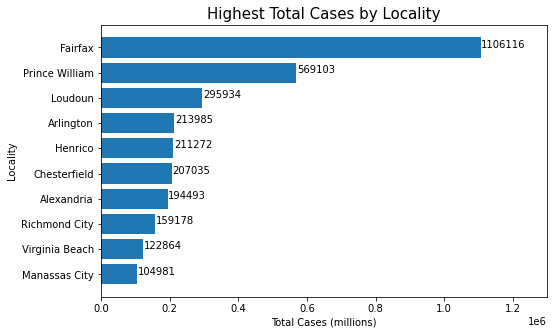

In [21]:
# defining the plot
plt.figure(figsize=(8,5))
case_plot = plt.barh(y = cases_df.head(10)['locality'], 
         width=cases_df.head(10).total_cases)

# adding labels, title, and limits
plt.xlabel('Total Cases (millions)')
plt.ylabel('Locality')
plt.title("Highest Total Cases by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=1300000) # expand right border

# add values to end of bars
for index, value in enumerate(cases_df.head(10).total_cases):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

We see the highest number of total cases for the period in Fairfax--almost double that of the next highest locality.

__Hospitalizations__

In [22]:
# by hospitalizations
hospitalizations_df = cities_df.groupby(
    'locality')['hospitalizations'].sum().sort_values(ascending=False)
hospitalizations_df.head(10)

# sorting highest - to - lowest by hospitalizations
hospitalizations_df = pd.DataFrame(cities_df.groupby('locality')[['hospitalizations']].sum().
                        sort_values(by='hospitalizations', ascending=False))

# adding an auto - incrementing index
hospitalizations_df.reset_index(inplace=True)

# viewing highest value for hospitalizations
hospitalizations_df.head(1)

locality  hospitalizations
0  Fairfax            138320

Fairfax also accounts for the highest number of COVID-19 hospitalizations, in the examined time period.


_Plot Hospitalizations_

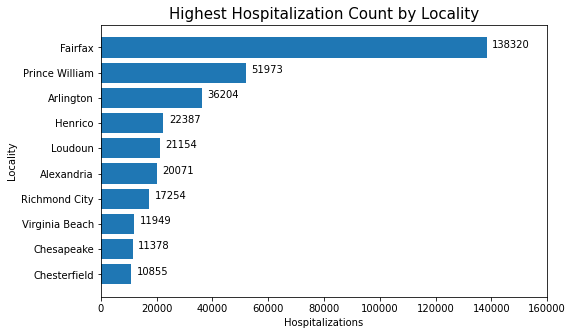

In [23]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = hospitalizations_df.head(10)['locality'], 
         width=hospitalizations_df.head(10).hospitalizations)

# adding labels, title, and limits
plt.xlabel('Hospitalizations')
plt.ylabel('Locality')
plt.title("Highest Hospitalization Count by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=160000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(hospitalizations_df.head(10).hospitalizations):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

The same localities in the top 5 for total cases are also in the top 5 for hospitalization. Fairfax reports more than 2.6 - times the hospitalizations of the next - highest reported locality, Prince William.

__Deaths__

In [24]:
# by deaths
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# by hospitalizations
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# sorting highest - to - lowest by deaths
deaths_df = pd.DataFrame(cities_df.groupby('locality')[['deaths']].sum().
                        sort_values(by='deaths', ascending=False))

# adding an auto - incrementing index
deaths_df.reset_index(inplace=True)

# viewing highest value for deaths
deaths_df.head(1)

locality  deaths
0  Fairfax   37990

The greatest number of related deaths are also reported from Fairfax.

_Plot Deaths_

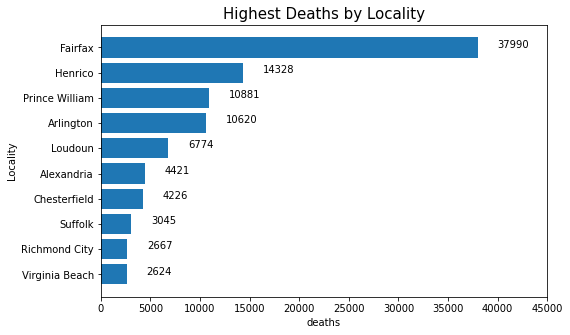

In [25]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = deaths_df.head(10)['locality'], 
         width=deaths_df.head(10).deaths)

# adding labels, title, and limits
plt.xlabel('deaths')
plt.ylabel('Locality')
plt.title("Highest Deaths by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=45000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(deaths_df.head(10).deaths):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

Fairfax records greater than 2.6 - times the number of deaths recorded for Henrico, the next highest reporting locality for this category.

__Limit the localities of interest.__

Virginia's Hampton Roads region experienced outbreaks in late July. We will plot them alongside the state's capital of Richmond (City) and compare cases, hospitalizations, and deaths over time.

In [26]:
# list the localities
print(sorted(set(x for x in cities_df.locality)))

['Accomack', 'Albemarle', 'Alexandria', 'Alleghany', 'Amelia', 'Amherst', 'Appomattox', 'Arlington', 'Augusta', 'Bath', 'Bedford', 'Bland', 'Botetourt', 'Bristol', 'Brunswick', 'Buchanan', 'Buckingham', 'Buena Vista City', 'Campbell', 'Caroline', 'Carroll', 'Charles City', 'Charlotte', 'Charlottesville', 'Chesapeake', 'Chesterfield', 'Clarke', 'Colonial Heights', 'Covington', 'Craig', 'Culpeper', 'Cumberland', 'Danville', 'Dickenson', 'Dinwiddie', 'Emporia', 'Essex', 'Fairfax', 'Fairfax City', 'Falls Church', 'Fauquier', 'Floyd', 'Fluvanna', 'Franklin City', 'Franklin County', 'Frederick', 'Fredericksburg', 'Galax', 'Giles', 'Gloucester', 'Goochland', 'Grayson', 'Greene', 'Greensville', 'Halifax', 'Hampton', 'Hanover', 'Harrisonburg', 'Henrico', 'Henry', 'Highland', 'Hopewell', 'Isle of Wight', 'James City', 'King George', 'King William', 'King and Queen', 'Lancaster', 'Lee', 'Lexington', 'Loudoun', 'Louisa', 'Lunenburg', 'Lynchburg', 'Madison', 'Manassas City', 'Manassas Park', 'Marti

In [27]:
# listing select localiies for visual EDA
select_localities = ['Chesapeake', 'Norfolk', 'Richmond City', 'Virginia Beach']

# filtering `cities_df` for the selected localities
selected = cities_df.locality.isin(select_localities)

# instantiating a new dataframe with filtered localities, only
select_df = cities_df[selected]

# viewing the number of records
print(select_df.shape)

# viewing the last 5 records in the dataset
select_df.tail()

(544, 6)


report_date   fips        locality  total_cases  hospitalizations  \
17950  07/29/2020  51760   Richmond City         2831               270   
18054  07/30/2020  51550      Chesapeake         2391               199   
18073  07/30/2020  51710         Norfolk         3080               165   
18079  07/30/2020  51760   Richmond City         2857               273   
18084  07/30/2020  51810  Virginia Beach         3979               193   

       deaths  
17950      39  
18054      27  
18073      22  
18079      38  
18084      43

### Bar Plot, Total Cases by Locality

In [28]:
# viewing an animated bar plot
fig = px.bar(select_df,  
             x ="locality",  
             y ="total_cases", 
             color ='deaths', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, 4250]) 
fig.show()

Richmond cases appear most likely to have resulted in death, through mid - July. It was then surpassed by Virginia Beach in both the number of deaths and in the total number of cases.

### Bar Plot, Deaths by Locality

In [29]:
fig = px.bar(select_df,  
             x ="locality",  
             y ="deaths", 
             color ='hospitalizations', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, 50]) 
fig.show()

The plot suggests that COVID cases were less - likely to receive hospital treatment, in Norfolk, compared to Richmond. As the rate of death seems to slow toward the end of July, for Richmond, it appears to pick up pace in Virginia Beach. Meanwhile, the number of Virginia Beach hospitalizations is well below that of Richmond.

### Scatter Plot: May - July, 2020 Totals, Deaths vs Cases by Locality

In [30]:
# animating a scatter plot, with deaths determining data - point size 
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="deaths",  
    y ="total_cases",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="deaths",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 80, 
    range_x =[-50, 200], 
    range_y =[-10, 5000] 
) 
fig.show()

### Scatter Plot: May - July, 2020 Totals, Deaths vs Hospitalizations by Locality

In [31]:
# using data - point size to reflect `total_cases`
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="deaths",  
    y ="hospitalizations",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="total_cases",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 100, 
    range_x =[-10, 75], 
    range_y =[-10, 325] 
) 
fig.show()

Scatter point size is not particularly informative, in this layout. By the completion of the animation, point sizes for each locality do not appear significantly different, despite the range in total cases they represent.

### Scatter Plot: May - July, 2020 Totals, Hospitalizations vs Cases by Locality

In [32]:
# 
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="hospitalizations",  
    y ="total_cases",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="total_cases",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 50, 
    range_x =[0, 300], 
    range_y =[-10, 4500] 
) 
fig.show()

In each of the preceding plots, we see cases growing more rapidly in Richmond at the start of our timeline, with Virginia Beach later overtaking the capital in daily deaths and total cases. While Virginia Beach led in the number of hospitalizatons, at the beginning of our timeline, it was far surpased by Richmond from the second week of May through July.

## Feature Engineering

Let's bring in some population data.

This dataset is obtained from University of Virginia's [Weldon Cooper Center for Public Service Demographics Research Group](https://demographics.coopercenter.org/virginia-population-estimates), and was published  on January 27, 2020.

Column Name |	Description	| Type
--- | --- | ---
FIPS Code |	3-digit code (XXX) for the locality |	 |	
Locality | Independent city or county in Virginia
April 1, 2010 Census| Official population, count from the 2010 Census
July 1, 2019 Estimate | Population approximation "based on a variety of observed administrative record data, such as births, deaths, school enrollment, and residential housing construction"

In [33]:
# importing numpy
import numpy as np

In [35]:
pop_df = pd.read_csv('data/VAPopulationEstimates_2019-07_UVACooperCenter.xlsx - 2019 Table.csv', 
                     skiprows=4)
pop_df

FIPS Code                                      Locality  \
0          NaN                                      Virginia   
1          NaN                                           NaN   
2          1.0                               Accomack County   
3          3.0                              Albemarle County   
4          5.0                              Alleghany County   
..         ...                                           ...   
179        NaN                           18 Middle Peninsula   
180        NaN                                     19 Crater   
181        NaN                       22 Accomack-Northampton   
182        NaN                              23 Hampton Roads   
183        NaN  * Some counties are members of multiple PDCs   

    April 1, 2010 Census July 1, 2019 Estimate Numeric Change Percent Change  
0              8,001,024             8,535,519        534,495           6.7%  
1                    NaN                   NaN            NaN            NaN  
2                 33,164                32,561           -603          -1.8%  
3                 99,010               109,722         10,712          10.8%  
4                 16,250                14,952         -1,298          -8.0%  
..                   ...                   ...            ...            ...  
179               90,826                91,247            421           0.5%  
180              496,955               530,142         33,187           6.7%  
181               45,553                44,371         -1,182          -2.6%  
182            1,666,310             1,729,109         62,799           3.8%  
183                  NaN                   NaN            NaN            NaN  

[184 rows x 6 columns]

We will reduce the dataset to eliminate unneeded columns and rows.

Since we know there should be 133 Federal Information Processing Standard (FIPS) codes, we will check a few rows beyond that.

In [36]:
# printing to verify planned operation
print(pop_df.iloc[2:136,:4])

     FIPS Code             Locality April 1, 2010 Census July 1, 2019 Estimate
2          1.0      Accomack County               33,164                32,561
3          3.0     Albemarle County               99,010               109,722
4          5.0     Alleghany County               16,250                14,952
5          7.0        Amelia County               12,690                13,053
6          9.0       Amherst County               32,353                31,766
..         ...                  ...                  ...                   ...
131      810.0  Virginia Beach City              437,994               452,643
132      820.0      Waynesboro City               21,006                22,183
133      830.0    Williamsburg City               14,067                15,383
134      840.0      Winchester City               26,203                28,180
135        NaN       Total Counties            5,548,355             5,960,959

[134 rows x 4 columns]


Row 135 is a summary row.

* We will remove the unneeded columns and summary row.
* We will also drop the `2010_census` column and use the `2019_estimate` column for our population data.
* `FIPS Code` will be converted to an integer.

In [37]:
# removing rows
pop_df = pop_df.iloc[2:135,:4].drop(['April 1, 2010 Census'], axis=1)

# converting type
pop_df['FIPS Code'] = pop_df['FIPS Code'].astype(int)
pop_df

FIPS Code             Locality July 1, 2019 Estimate
2            1      Accomack County                32,561
3            3     Albemarle County               109,722
4            5     Alleghany County                14,952
5            7        Amelia County                13,053
6            9       Amherst County                31,766
..         ...                  ...                   ...
130        800         Suffolk City                93,825
131        810  Virginia Beach City               452,643
132        820      Waynesboro City                22,183
133        830    Williamsburg City                15,383
134        840      Winchester City                28,180

[133 rows x 3 columns]

Now, we will rename our column labels.

In [38]:
# renaming columns, replacing spaces with underscores and converting to lowercase
pop_df.rename(columns = {'FIPS Code':'fips_code', 
                         'Locality':'locality', 
                         'July 1, 2019 Estimate: 3':'2019_estimate'}, 
              inplace = True)

Let's add the Virginia prefix (51) to `fips_code`, to match our `fips` column in  `cities_df`. First, we need to prepend zeros to codes with fewer than 3 digits.

In [39]:
# padding `fips_code` with zeros to fill to length 3
pop_df['fips_code']=pop_df['fips_code'].apply(lambda x: '{0:0>3}'.format(x))

print(pop_df['fips_code'].head())

2    001
3    003
4    005
5    007
6    009
Name: fips_code, dtype: object


Note: padding the values with leading zeros converts the data type to objece / string.

In [40]:
# preceding all `fips_code` values with VA state FIPS code "51"
pop_df['fips_code'] = pop_df['fips_code'].apply(lambda x: '51' + x)

# viewing first and last rows
pop_df

fips_code             locality July 1, 2019 Estimate
2       51001      Accomack County                32,561
3       51003     Albemarle County               109,722
4       51005     Alleghany County                14,952
5       51007        Amelia County                13,053
6       51009       Amherst County                31,766
..        ...                  ...                   ...
130     51800         Suffolk City                93,825
131     51810  Virginia Beach City               452,643
132     51820      Waynesboro City                22,183
133     51830    Williamsburg City                15,383
134     51840      Winchester City                28,180

[133 rows x 3 columns]



*   Convert the `fips_code` data type back to int.
*   Remove commas and convert the `July 1, 2019 Estimate` data type to int.



In [41]:
# checking dtypes pre - conversion
print("Original dtypes\n\n", pop_df.dtypes, "\n\n", "="*60)

# correcting dtype
pop_df.fips_code = pop_df.fips_code.astype(int)

# removing commas and correcting dtype
pop_df["July 1, 2019 Estimate"] = pop_df["July 1, 2019 Estimate"].str.replace(
    ",", ""
    ).astype(int)

# checking dtypes post - conversion
print("Converted dtypes\n\n", pop_df.dtypes, "\n\n")

# viewing first rows
pop_df.head()

Original dtypes

 fips_code                object
locality                 object
July 1, 2019 Estimate    object
dtype: object 

Converted dtypes

 fips_code                 int64
locality                 object
July 1, 2019 Estimate     int64
dtype: object 




fips_code          locality  July 1, 2019 Estimate
2      51001   Accomack County                  32561
3      51003  Albemarle County                 109722
4      51005  Alleghany County                  14952
5      51007     Amelia County                  13053
6      51009    Amherst County                  31766

We can use our `fips_code` to merge population data with our `cities_df` data (matching on its `FIPS` column), to analyze our cases, hospitalizations, and deaths against population estimates. We will only need the code and estimate colums, though.

In [42]:
# copying `pop_df`, dropping the locality column
pop_estimate_df = pop_df.copy().drop(['locality'], axis=1)

# viewing the new dataframe's first 5 rows
pop_estimate_df.head()

fips_code  July 1, 2019 Estimate
2      51001                  32561
3      51003                 109722
4      51005                  14952
5      51007                  13053
6      51009                  31766

Let's clean up the column label.

In [43]:
# updating column labels
pop_estimate_df.columns = ['fips_code', '2019_estimate']

# verifying updated labels
pop_estimate_df.columns

Index(['fips_code', '2019_estimate'], dtype='object')

Let's see what is our population range of values.

In [44]:
# sort `2019_estimate` to view its range of values
pop_estimate_df["2019_estimate"].sort_values()

46        2246
121       3879
10        4318
24        5108
105       5589
        ...   
22      350760
54      413546
131     452643
74      465498
30     1143528
Name: 2019_estimate, Length: 133, dtype: int64

The range of values suggests that we can engineer meaningful features per 1000 of population for each locality.

### Merge Dataframes

We will combine our `cities_df` COVID-19 data with our `pop_estimate_df` population data.

In [45]:
# merging on `FIPS` and `fips_code` columns
combined_df = cities_df.merge(pop_estimate_df, 
                              left_on='fips', 
                              right_on='fips_code', 
                              how='left')

View the first few rows of the combined dataframe.

In [46]:
# view the first 5 entries where the FIPS`code is 51001
combined_df[combined_df['fips']==51001].head()

report_date   fips  locality  total_cases  hospitalizations  deaths  \
0    03/17/2020  51001  Accomack            0                 0       0   
133  03/18/2020  51001  Accomack            0                 0       0   
266  03/19/2020  51001  Accomack            0                 0       0   
399  03/20/2020  51001  Accomack            1                 0       0   
532  03/21/2020  51001  Accomack            1                 0       0   

     fips_code  2019_estimate  
0        51001          32561  
133      51001          32561  
266      51001          32561  
399      51001          32561  
532      51001          32561

In [47]:
# verifying data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18088 entries, 0 to 18087
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_date       18088 non-null  object
 1   fips              18088 non-null  int64 
 2   locality          18088 non-null  object
 3   total_cases       18088 non-null  int64 
 4   hospitalizations  18088 non-null  int64 
 5   deaths            18088 non-null  int64 
 6   fips_code         18088 non-null  int64 
 7   2019_estimate     18088 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


Drop the duplicate `fips_code` column.

In [48]:
# dropping `fips_code`
combined_df.drop("fips_code", axis=1, inplace=True)

# viewing the first two rows
combined_df[combined_df['fips']==51001].head(2)

report_date   fips  locality  total_cases  hospitalizations  deaths  \
0    03/17/2020  51001  Accomack            0                 0       0   
133  03/18/2020  51001  Accomack            0                 0       0   

     2019_estimate  
0            32561  
133          32561

### Feature Engineering--per 1K

In [49]:
# creating columns for statistical features per 1,000 of population
combined_df['cases_per_1k'] = round((combined_df["total_cases"]) / (
    combined_df["2019_estimate"]) * 1000, 3)
combined_df['hosps_per_1k'] = round((combined_df["hospitalizations"]) / (
    combined_df["2019_estimate"]) * 1000, 3)
combined_df['deaths_per_1k'] = round((combined_df["deaths"]) / (
    combined_df["2019_estimate"]) * 1000, 3)

In [50]:
# viewing arbitrary rows with engineered columns
combined_df.iloc[4750:4770, :]

report_date   fips          locality  total_cases  hospitalizations  \
4750  04/21/2020  51510        Alexandria          462                60   
4751  04/21/2020  51520           Bristol            1                 0   
4752  04/21/2020  51530  Buena Vista City            5                 0   
4753  04/21/2020  51540   Charlottesville           41                11   
4754  04/21/2020  51550        Chesapeake          176                39   
4755  04/21/2020  51570  Colonial Heights           36                 0   
4756  04/21/2020  51580         Covington            1                 0   
4757  04/21/2020  51590          Danville           29                13   
4758  04/21/2020  51595           Emporia           12                 3   
4759  04/21/2020  51600      Fairfax City           22                 2   
4760  04/21/2020  51610      Falls Church           24                 2   
4761  04/21/2020  51620     Franklin City           12                 0   
4762  04/21/2020  51630    Fredericksburg           17                 3   
4763  04/21/2020  51640             Galax            1                 1   
4764  04/21/2020  51650           Hampton           92                26   
4765  04/21/2020  51660      Harrisonburg          264                12   
4766  04/21/2020  51670          Hopewell           16                 5   
4767  04/21/2020  51678         Lexington            3                 0   
4768  04/21/2020  51680         Lynchburg           43                 4   
4769  04/21/2020  51683     Manassas City          110                14   

      deaths  2019_estimate  cases_per_1k  hosps_per_1k  deaths_per_1k  
4750       9         159152         2.903         0.377          0.057  
4751       0          17018         0.059         0.000          0.000  
4752       0           6454         0.775         0.000          0.000  
4753       2          49181         0.834         0.224          0.041  
4754       5         245745         0.716         0.159          0.020  
4755       2          17194         2.094         0.000          0.116  
4756       0           5694         0.176         0.000          0.000  
4757       1          39932         0.726         0.326          0.025  
4758       1           5589         2.147         0.537          0.179  
4759       1          23943         0.919         0.084          0.042  
4760       1          14331         1.675         0.140          0.070  
4761       0           8261         1.453         0.000          0.000  
4762       0          28532         0.596         0.105          0.000  
4763       0           6545         0.153         0.153          0.000  
4764       1         135753         0.678         0.192          0.007  
4765       0          53997         4.889         0.222          0.000  
4766       0          22718         0.704         0.220          0.000  
4767       0           7432         0.404         0.000          0.000  
4768       1          80783         0.532         0.050          0.012  
4769       0          41757         2.634         0.335          0.000

In [51]:
# viewing the row with max cases per 1000
combined_df[combined_df["cases_per_1k"] == combined_df["cases_per_1k"].max()]

report_date   fips locality  total_cases  hospitalizations  deaths  \
18063  07/30/2020  51640    Galax          329                37      17   

       2019_estimate  cases_per_1k  hosps_per_1k  deaths_per_1k  
18063           6545        50.267         5.653          2.597

In [52]:
# viewing the row with max hospitalizations per 1000
combined_df[combined_df["hosps_per_1k"] == combined_df["hosps_per_1k"].max()]

report_date   fips locality  total_cases  hospitalizations  deaths  \
18063  07/30/2020  51640    Galax          329                37      17   

       2019_estimate  cases_per_1k  hosps_per_1k  deaths_per_1k  
18063           6545        50.267         5.653          2.597

In [53]:
# viewing the row with max deaths per 1000
combined_df[combined_df["deaths_per_1k"] == combined_df["deaths_per_1k"].max()]

report_date   fips locality  total_cases  hospitalizations  deaths  \
14467  07/03/2020  51595  Emporia          141                22      15   
14600  07/04/2020  51595  Emporia          141                22      15   
14733  07/05/2020  51595  Emporia          143                23      15   
14866  07/06/2020  51595  Emporia          143                23      15   
14999  07/07/2020  51595  Emporia          145                23      15   
15132  07/08/2020  51595  Emporia          145                23      15   
15265  07/09/2020  51595  Emporia          147                23      15   
15398  07/10/2020  51595  Emporia          147                23      15   
15531  07/11/2020  51595  Emporia          146                23      15   
15664  07/12/2020  51595  Emporia          146                23      15   
15797  07/13/2020  51595  Emporia          146                23      15   
15930  07/14/2020  51595  Emporia          146                23      15   
16063  07/15/2020  51595  Emporia          146                23      15   
16196  07/16/2020  51595  Emporia          148                23      15   
16329  07/17/2020  51595  Emporia          148                23      15   
16462  07/18/2020  51595  Emporia          151                24      15   
16595  07/19/2020  51595  Emporia          151                24      15   
16728  07/20/2020  51595  Emporia          151                24      15   
16861  07/21/2020  51595  Emporia          152                24      15   
16994  07/22/2020  51595  Emporia          154                24      15   
17141  07/23/2020  51595  Emporia          156                24      15   
17260  07/24/2020  51595  Emporia          156                24      15   
17393  07/25/2020  51595  Emporia          156                24      15   
17526  07/26/2020  51595  Emporia          157                24      15   
17659  07/27/2020  51595  Emporia          161                24      15   
17792  07/28/2020  51595  Emporia          163                24      15   
17873  07/29/2020  51595  Emporia          164                24      15   
18058  07/30/2020  51595  Emporia          163                24      15   

       2019_estimate  cases_per_1k  hosps_per_1k  deaths_per_1k  
14467           5589        25.228         3.936          2.684  
14600           5589        25.228         3.936          2.684  
14733           5589        25.586         4.115          2.684  
14866           5589        25.586         4.115          2.684  
14999           5589        25.944         4.115          2.684  
15132           5589        25.944         4.115          2.684  
15265           5589        26.302         4.115          2.684  
15398           5589        26.302         4.115          2.684  
15531           5589        26.123         4.115          2.684  
15664           5589        26.123         4.115          2.684  
15797           5589        26.123         4.115          2.684  
15930           5589        26.123         4.115          2.684  
16063           5589        26.123         4.115          2.684  
16196           5589        26.481         4.115          2.684  
16329           5589        26.481         4.115          2.684  
16462           5589        27.017         4.294          2.684  
16595           5589        27.017         4.294          2.684  
16728           5589        27.017         4.294          2.684  
16861           5589        27.196         4.294          2.684  
16994           5589        27.554         4.294          2.684  
17141           5589        27.912         4.294          2.684  
17260           5589        27.912         4.294          2.684  
17393           5589        27.912         4.294          2.684  
17526           5589        28.091         4.294          2.684  
17659           5589        28.807         4.294          2.684  
17792           5589        29.164         4.294          2.684  
17873           558

#### Histograms

We can view a histogram of the combined dataset's "cases_per_1k", colored by locality and separated into 50 bins.

In [54]:
# viewing a histogram of cases per 1000, in 50 bins
fig = px.histogram(combined_df, 
                   x="cases_per_1k", 
                   y="fips", 
                   color="locality", 
                   nbins=50, 
                   marginal="rug",
                   hover_data=combined_df.columns)
fig.show()

We observe a long tail, to the right, due to both the presence of localities with relatively low populations (making each of their cases more significant as a fraction of population) and to the number of records (daily) for each of those localities.

> Each record of more than 40 cases per 1,000 of populatioin occurs in the same locality.

In [58]:
# viewing hospitaliations, using only 10 bins
fig = px.histogram(combined_df, 
                   x="hosps_per_1k", 
                   y="fips", 
                   color="locality",
                   nbins=10, 
                   marginal="rug",
                   hover_data=combined_df.columns)
fig.show()

Each record of more than 40 hospitalizations per 1,000 of populatioin occurs in the same locality.

In [59]:
# viewing a histogram of deaths by locality, in 5 bins
fig = px.histogram(combined_df, 
                   x="deaths_per_1k", 
                   y="fips", 
                   color="locality",
                   nbins=5,  
                   marginal="rug",
                   hover_data=combined_df.columns)
fig.show()

There are few distinct localities in the tail.

### Animated Plots for Combined Dataframe

Let's return to our select localities, to analyze them per 1k of population.

In [60]:
# filtering `cities_df` for the selected localities
selected = combined_df.locality.isin(select_localities)

# instantiating a new dataframe with filtered localities, only
combined_selected_df = combined_df[selected]

#### Bar Plot, Total Cases per 1k by Select Locality

In [61]:
# viewing an animated bar plot
fig = px.bar(combined_selected_df,  
             x ="locality",  
             y ="cases_per_1k", 
             color ='deaths_per_1k', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, 15]) 
fig.show()

### Bar Plot, Deaths per 1K by Locality

In [62]:
fig = px.bar(combined_selected_df,  
             x ="locality",  
             y ="deaths_per_1k", 
             color ='hosps_per_1k', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, .2]) 
fig.show()

### Scatter Plot: May - July, 2020 Locality Deaths, Hosps per 1k vs Total Cases per 1K

In [63]:
# animating a scatter plot, with deaths determining data - point size 
fig = px.scatter( 
    combined_selected_df[combined_selected_df.report_date > "04/30/2020"],  
    x ="hosps_per_1k",  
    y ="cases_per_1k",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="deaths_per_1k",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 80, 
    range_x =[-.5, 2], 
    range_y =[-2, 20],
    title="Locality Deaths, Hosps per 1k Against Total Cases per 1k" 
) 
fig.show()

### Scatter Plot: May - July, 2020 Locality Cases, Deaths per 1K vs Hospitalizations per 1k

In [64]:
# using a smaller point size to reflect `cases_per_1k`
fig = px.scatter( 
    combined_selected_df[combined_selected_df.report_date > "04/30/2020"],  
    x ="deaths_per_1k",  
    y ="hosps_per_1k",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="cases_per_1k",  
    color ="locality", 
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 80, 
    range_x =[-.05, .25], 
    range_y =[0, 1.5], 
    title = "Total Cases and Deaths (per 1k) Against Hospitalizations per 1k"
) 
fig.show()

### Scatter Plot: May - July, 2020 Locality Cases, Hospitalizations (per 1K) vs Deaths per 1K

In [65]:
# using `cases_per_1k`
fig = px.scatter( 
    combined_selected_df[combined_selected_df.report_date > "04/30/2020"],  
    x ="hosps_per_1k",  
    y ="deaths_per_1k",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="cases_per_1k",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 80, 
    range_x =[0, 2], 
    range_y =[0, .25], 
    title = "Total Cases and Hospitalizations (per 1k) Against Deaths per 1k" 
) 
fig.show()